# Pytorch Tutorial

Pytorch is a popular deep learning framework and it's easy to get started.

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm_notebook
import time
import matplotlib.pyplot as plt

BATCH_SIZE = 512
NUM_EPOCHS = 60

First, we read the mnist data, preprocess them and encapsulate them into dataloader form.

In [2]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)
print(train_dataset)
# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )


Then, we define the model, object function and optimizer that we use to classify.

In [35]:
class SimpleNet(nn.Module):
# TODO:define model
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 12, kernel_size=3, stride=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(12),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # nn.Dropout(0.5)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(12, 16, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # nn.Dropout(0.5)
        )
        self.classifier = nn.Sequential(
            nn.Linear(256, 10),
            # nn.SELU(inplace=True),
            # nn.Linear(100, 10)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0),-1)
        x = self.classifier(x)
        return x





Next, we can start to train and evaluate!

In [36]:
model = SimpleNet()
# print(model)

# TODO:define loss function and optimiter
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)


# train and evaluate
if torch.cuda.is_available():
    model = model.cuda()
    
accuracy_train = torch.zeros(NUM_EPOCHS*117, device='cuda')
accuracy_test = torch.zeros(NUM_EPOCHS, device='cuda')
loss_train = torch.zeros(NUM_EPOCHS*117, device='cuda')
loss_test = torch.zeros(NUM_EPOCHS, device='cuda')

for epoch in range(NUM_EPOCHS):
    print('epoch: ', epoch)
    accuracys = 0
    losses = 0
    count = 0
    for images, labels in tqdm_notebook(train_loader, desc='training'):
        # TODO:forward + backward + optimize
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()     
        predictions = model(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        decision = torch.max(predictions, 1)[1]
        # print('loss: ', loss.item())
        accuracy = ((decision.long() == labels).sum()).float() / labels.size(0)
        accuracy_train[epoch * 117 + count] = accuracy.item()
        loss_train[epoch * 117 + count] = loss.item()
        accuracys += accuracy.item()
        losses += loss.item()
        count += 1
        torch.cuda.empty_cache()
    accuracys = accuracys / count
    losses = losses / count
    print('accuracy on training set: ', accuracys)
    print('loss on training set: ', losses)
    
    accuracys = 0
    losses = 0
    count = 0
    for images, labels in tqdm_notebook(test_loader, desc='testing'):
        # TODO:forward + backward + optimize
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        predictions = model(images)
        loss = criterion(predictions, labels)
        decision = torch.max(predictions, 1)[1]
        accuracy = ((decision.long() == labels).sum()).float() / labels.size(0)
        accuracys += accuracy.item()
        losses += loss.item()
        count += 1
        torch.cuda.empty_cache()
    accuracys = accuracys / count
    losses = losses / count
    print('accuracy on test set: ', accuracys)
    print('loss on test set: ', losses)
    accuracy_test[epoch] = accuracys
    loss_test[epoch] = losses
    # evaluate
    # TODO:calculate the accuracy using traning and testing dataset
    
accuracy_train = accuracy_train.cpu().numpy()
accuracy_test = accuracy_test.cpu().numpy()
loss_train = loss_train.cpu().numpy()
loss_test = loss_test.cpu().numpy()    
    
    
    


epoch:  0



accuracy on training set:  0.8534321581196581
loss on training set:  0.5417764422475783



accuracy on test set:  0.962171052631579
loss on test set:  0.1518757315842729
epoch:  1



accuracy on training set:  0.9644097222222222
loss on training set:  0.1295551880557313



accuracy on test set:  0.9751233552631579
loss on test set:  0.09164030830326833
epoch:  2



accuracy on training set:  0.9745592948717948
loss on training set:  0.09101886448697147



accuracy on test set:  0.9791324013157895
loss on test set:  0.07430220424736801
epoch:  3



accuracy on training set:  0.9794337606837606
loss on training set:  0.07452874984114598



accuracy on test set:  0.9819078947368421
loss on test set:  0.06470067103050257
epoch:  4



accuracy on training set:  0.9820212339743589
loss on training set:  0.06545982904668547



accuracy on test set:  0.9835526315789473
loss on test set:  0.061101880414705524
epoch:  5



accuracy on training set:  0.9837573450854701
loss on training set:  0.05957919785864333



accuracy on test set:  0.9847861842105263
loss on test set:  0.0574959252813929
epoch:  6



accuracy on training set:  0.9849759615384616
loss on training set:  0.056523087155869886



accuracy on test set:  0.9849917763157895
loss on test set:  0.05675269859401803
epoch:  7



accuracy on training set:  0.9865785256410257
loss on training set:  0.05409374135809067



accuracy on test set:  0.9857113486842105
loss on test set:  0.05316240252240708
epoch:  8



accuracy on training set:  0.9871127136752137
loss on training set:  0.05219315866438242



accuracy on test set:  0.9871504934210527
loss on test set:  0.05161936355656699
epoch:  9



accuracy on training set:  0.9872796474358975
loss on training set:  0.05110700638630451



accuracy on test set:  0.9865337171052632
loss on test set:  0.05250948294997215
epoch:  10



accuracy on training set:  0.9875801282051282
loss on training set:  0.050125870153180555



accuracy on test set:  0.985608552631579
loss on test set:  0.05317138057006033
epoch:  11



accuracy on training set:  0.9882979433760684
loss on training set:  0.04892752263854202



accuracy on test set:  0.9873560855263158
loss on test set:  0.049542669598993505
epoch:  12



accuracy on training set:  0.9884982638888888
loss on training set:  0.0475684048082584



accuracy on test set:  0.985608552631579
loss on test set:  0.05120827522324888
epoch:  13



accuracy on training set:  0.9884815705128205
loss on training set:  0.04746555594297556



accuracy on test set:  0.9864309210526315
loss on test set:  0.048681219794640414
epoch:  14



accuracy on training set:  0.9888989049145299
loss on training set:  0.046025357041985564



accuracy on test set:  0.9864309210526315
loss on test set:  0.051082114934136995
epoch:  15



accuracy on training set:  0.9893162393162394
loss on training set:  0.04599837614939763



accuracy on test set:  0.9871504934210527
loss on test set:  0.05046998444748552
epoch:  16



accuracy on training set:  0.9893329326923077
loss on training set:  0.04493122516024826



accuracy on test set:  0.9872532894736842
loss on test set:  0.04786770555533861
epoch:  17



accuracy on training set:  0.9898003472222222
loss on training set:  0.04439710840009726



accuracy on test set:  0.9879728618421053
loss on test set:  0.047869174447106685
epoch:  18



accuracy on training set:  0.9899005074786325
loss on training set:  0.04386363460276371



accuracy on test set:  0.9868421052631579
loss on test set:  0.04689949976378366
epoch:  19



accuracy on training set:  0.9900841346153846
loss on training set:  0.04341876105620311



accuracy on test set:  0.9885896381578947
loss on test set:  0.04523755011982039
epoch:  20



accuracy on training set:  0.9899338942307693
loss on training set:  0.043560371057600036



accuracy on test set:  0.98828125
loss on test set:  0.0464179336436485
epoch:  21



accuracy on training set:  0.9903011485042735
loss on training set:  0.04330430168690335



accuracy on test set:  0.9884868421052632
loss on test set:  0.047231308723750864
epoch:  22



accuracy on training set:  0.9903345352564102
loss on training set:  0.04249890613504964



accuracy on test set:  0.9883840460526315
loss on test set:  0.0470536549232508
epoch:  23



accuracy on training set:  0.9906350160256411
loss on training set:  0.041772999522140905



accuracy on test set:  0.9883840460526315
loss on test set:  0.04512619183055664
epoch:  24



accuracy on training set:  0.9908019497863247
loss on training set:  0.04124668882124954



accuracy on test set:  0.9891036184210527
loss on test set:  0.04625548147841504
epoch:  25



accuracy on training set:  0.9908854166666666
loss on training set:  0.04145067559284532



accuracy on test set:  0.9876644736842105
loss on test set:  0.04678136855363846
epoch:  26



accuracy on training set:  0.9908520299145299
loss on training set:  0.04113615802529021



accuracy on test set:  0.9874588815789473
loss on test set:  0.04479283697314953
epoch:  27



accuracy on training set:  0.9915030715811965
loss on training set:  0.04053066648606561



accuracy on test set:  0.9886924342105263
loss on test set:  0.04514213043608164
epoch:  28



accuracy on training set:  0.9912526709401709
loss on training set:  0.04114269450880014



accuracy on test set:  0.9874588815789473
loss on test set:  0.045153361402059854
epoch:  29



accuracy on training set:  0.990768563034188
loss on training set:  0.04110290850393283



accuracy on test set:  0.9888980263157895
loss on test set:  0.04351646712932147
epoch:  30



accuracy on training set:  0.9913361378205128
loss on training set:  0.04051402343325635



accuracy on test set:  0.989000822368421
loss on test set:  0.04295884607065665
epoch:  31



accuracy on training set:  0.9912860576923077
loss on training set:  0.04029710089358



accuracy on test set:  0.990234375
loss on test set:  0.043081042601874
epoch:  32



accuracy on training set:  0.9909354967948718
loss on training set:  0.04014719223492166



accuracy on test set:  0.9896175986842105
loss on test set:  0.04361013127000708
epoch:  33



accuracy on training set:  0.9912192841880342
loss on training set:  0.040220587792941645



accuracy on test set:  0.9900287828947368
loss on test set:  0.04402044841921643
epoch:  34



accuracy on training set:  0.9910189636752137
loss on training set:  0.04038098602531812



accuracy on test set:  0.989000822368421
loss on test set:  0.04445805827057675
epoch:  35



accuracy on training set:  0.9912359775641025
loss on training set:  0.039862386882305145



accuracy on test set:  0.9887952302631579
loss on test set:  0.04457017960713098
epoch:  36



accuracy on training set:  0.9912025908119658
loss on training set:  0.039872377346723505



accuracy on test set:  0.9898231907894737
loss on test set:  0.0431108112005811
epoch:  37



accuracy on training set:  0.9912860576923077
loss on training set:  0.03955296078362526



accuracy on test set:  0.9892064144736842
loss on test set:  0.042816732863062305
epoch:  38



accuracy on training set:  0.9913695245726496
loss on training set:  0.039252057958107725



accuracy on test set:  0.9888980263157895
loss on test set:  0.04338622504943296
epoch:  39



accuracy on training set:  0.9914029113247863
loss on training set:  0.038803041458894044



accuracy on test set:  0.9892064144736842
loss on test set:  0.04415848674742799
epoch:  40



accuracy on training set:  0.9916366185897436
loss on training set:  0.03912226257161198



accuracy on test set:  0.9900287828947368
loss on test set:  0.0435359808861425
epoch:  41



accuracy on training set:  0.9913528311965812
loss on training set:  0.0392226364909329



accuracy on test set:  0.989514802631579
loss on test set:  0.044094722080779705
epoch:  42



accuracy on training set:  0.9912860576923077
loss on training set:  0.03963540752346699



accuracy on test set:  0.989000822368421
loss on test set:  0.043288373731468856
epoch:  43



accuracy on training set:  0.9913695245726496
loss on training set:  0.039079426732073486



accuracy on test set:  0.9894120065789473
loss on test set:  0.042636846584316934
epoch:  44



accuracy on training set:  0.9916199252136753
loss on training set:  0.03866653706337142



accuracy on test set:  0.9897203947368421
loss on test set:  0.04379180362938266
epoch:  45



accuracy on training set:  0.9914529914529915
loss on training set:  0.038319472971762344



accuracy on test set:  0.9896175986842105
loss on test set:  0.04453005229956225
epoch:  46



accuracy on training set:  0.9913194444444444
loss on training set:  0.038682548281473994



accuracy on test set:  0.9894120065789473
loss on test set:  0.04424419950105642
epoch:  47



accuracy on training set:  0.9911358173076923
loss on training set:  0.03899075004916925



accuracy on test set:  0.9880756578947368
loss on test set:  0.04611222220486716
epoch:  48



accuracy on training set:  0.9920706463675214
loss on training set:  0.03811036562945089



accuracy on test set:  0.9887952302631579
loss on test set:  0.04586128356229318
epoch:  49



accuracy on training set:  0.9911358173076923
loss on training set:  0.03851549050364739



accuracy on test set:  0.9894120065789473
loss on test set:  0.04286763758251542
epoch:  50



accuracy on training set:  0.9914696848290598
loss on training set:  0.038274897151013725



accuracy on test set:  0.9905427631578947
loss on test set:  0.04241099728173331
epoch:  51



accuracy on training set:  0.9916032318376068
loss on training set:  0.03818549567626582



accuracy on test set:  0.98828125
loss on test set:  0.04348514116320171
epoch:  52



accuracy on training set:  0.9911191239316239
loss on training set:  0.03875019769064891



accuracy on test set:  0.9886924342105263
loss on test set:  0.044181731480516885
epoch:  53



accuracy on training set:  0.9912860576923077
loss on training set:  0.03861142196652726



accuracy on test set:  0.9898231907894737
loss on test set:  0.044120657355769685
epoch:  54



accuracy on training set:  0.9919537927350427
loss on training set:  0.03796349217494329



accuracy on test set:  0.9883840460526315
loss on test set:  0.044012582517768205
epoch:  55



accuracy on training set:  0.9916700053418803
loss on training set:  0.03787731380862558



accuracy on test set:  0.9893092105263158
loss on test set:  0.04212202033714244
epoch:  56



accuracy on training set:  0.9919704861111112
loss on training set:  0.0375198822022758



accuracy on test set:  0.9885896381578947
loss on test set:  0.04523409412879693
epoch:  57



accuracy on training set:  0.9918035523504274
loss on training set:  0.03769947320987017



accuracy on test set:  0.9897203947368421
loss on test set:  0.04110778314306548
epoch:  58



accuracy on training set:  0.9916199252136753
loss on training set:  0.038199087541200154



accuracy on test set:  0.9898231907894737
loss on test set:  0.04267261245925175
epoch:  59



accuracy on training set:  0.9911024305555556
loss on training set:  0.03815885771734592



accuracy on test set:  0.98828125
loss on test set:  0.04482414960665138


0.9905427694320679


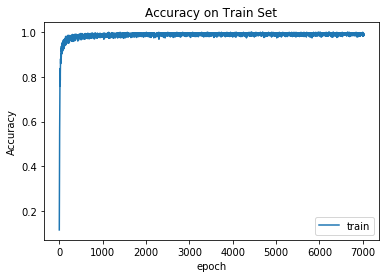

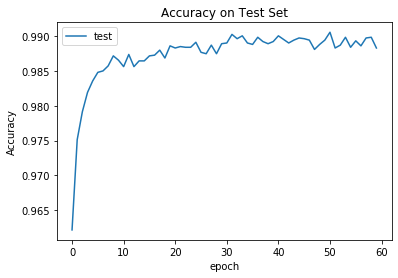

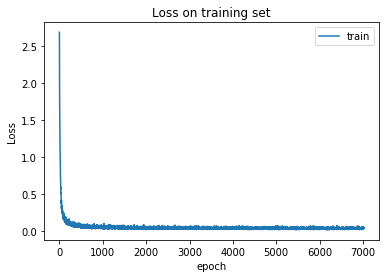

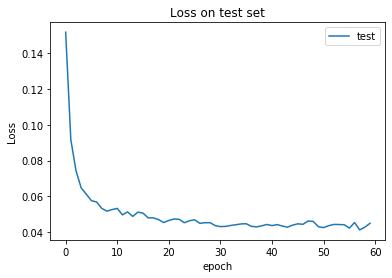

In [37]:
print(accuracy_test.max().item())

l1,=plt.plot(list(range(len(accuracy_train))),accuracy_train)
# l2,=plt.plot(list(range(len(accuracy_test))),accuracy_test)
plt.legend(handles = [l1], labels = ['train'], loc = 'best')
plt.ylabel('Accuracy') 
plt.xlabel('epoch')
plt.title('Accuracy on Train Set') 
plt.show()

l2,=plt.plot(list(range(len(accuracy_test))),accuracy_test)
plt.legend(handles = [l2], labels = ['test'], loc = 'best')
plt.ylabel('Accuracy') 
plt.xlabel('epoch')
plt.title('Accuracy on Test Set') 
plt.show()

l3,=plt.plot(list(range(len(loss_train))),loss_train)
# l2,=plt.plot(list(range(len(accuracy_test))),accuracy_test)
plt.legend(handles = [l1], labels = ['train'], loc = 'best')
plt.ylabel('Loss') 
plt.xlabel('epoch')
plt.title('Loss on training set') 
plt.show()

l4,=plt.plot(list(range(len(loss_test))),loss_test)
plt.legend(handles = [l2], labels = ['test'], loc = 'best')
plt.ylabel('Loss') 
plt.xlabel('epoch')
plt.title('Loss on test set') 
plt.show()

#### Q5:
Please print the training and testing accuracy.